In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset_path = 'union-pareto/DS02.csv'
df = pd.read_csv(dataset_path, header=None)
df.columns = ['Solution-size', 'Classification-error']
df['Solution-size'] = df['Solution-size'].round()
df['Solution-size'] = df['Solution-size'].astype(int)
df.to_csv(dataset_path ,index=False, header=True)

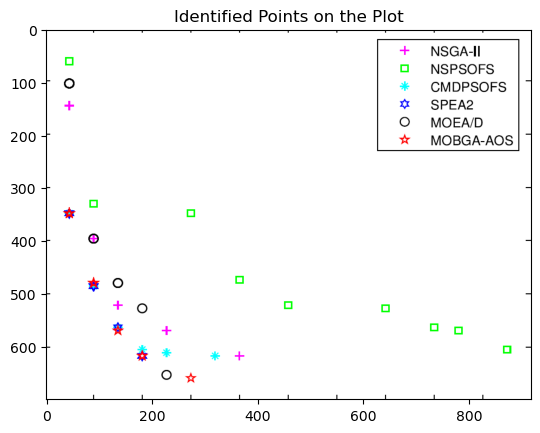

Centroids: [(273, 660), (181, 618), (135, 570), (89, 480), (43, 348), (677, 209)]


In [3]:
image_path = 'other_plots/DS02.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
lower_color = np.array([0, 0, 200])
upper_color = np.array([50, 50, 255])
mask = cv2.inRange(image, lower_color, upper_color)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
centroids = [tuple(map(int, cv2.mean(c)[:2])) for c in contours]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Identified Points on the Plot')
plt.show()
print("Centroids:", centroids)

13


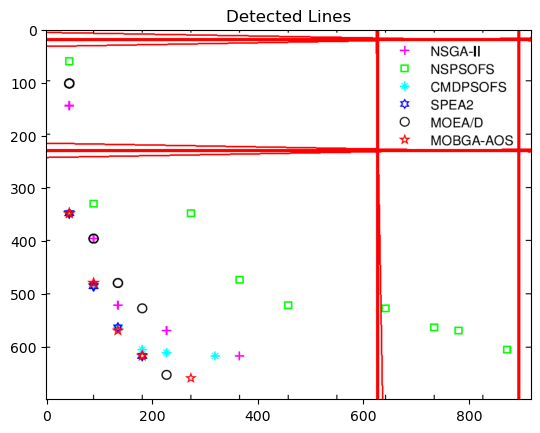

In [6]:
image_path = 'other_plots/DS02.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.show()